In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

import ipywidgets as widgets
from IPython.display import display

import PIL
import PIL.Image
import pathlib
from PIL import Image
import io

from matplotlib import pyplot as plt
import matplotlib as mpl
import tensorflow as tf

from sklearn.metrics import confusion_matrix
import seaborn as sns

print(tf.__version__)

2.10.0


In [3]:
# Load the entire model
loaded_model = tf.keras.models.load_model('project_model')

# If you only saved the weights, you need the model's architecture to load the weights.
# Assuming you have the architecture of the model defined in 'model':
# model.load_weights('project_model.h5')

In [4]:
class_names = [
    "Alexandrite", "Almandine", "Amazonite", "Amber", "Amethyst", "Ametrine", "Andalusite", "Andradite",
    "Aquamarine", "Aventurine Green", "Aventurine Yellow", "Benitoite", "Beryl Golden", "Bixbite",
    "Bloodstone", "Blue Lace Agate", "Brazilianite", "Carnelian", "Cats Eye", "Chalcedony",
    "Chalcedony Blue", "Chrome Diopside", "Chrysoberyl", "Chrysocolla", "Chrysoprase", "Citrine",
    "Coral", "Danburite", "Diamond", "Diaspore", "Dumortierite", "Emerald", "Fluorite", "Garnet Red",
    "Goshenite", "Grossular", "Hessonite", "Hiddenite", "Iolite", "Jade", "Jasper", "Kunzite",
    "Kyanite", "Labradorite", "Lapis Lazuli", "Larimar", "Malachite", "Moonstone", "Morganite",
    "Onyx Black", "Onyx Green", "Onyx Red", "Opal", "Pearl", "Peridot", "Prehnite", "Pyrite",
    "Pyrope", "Quartz Beer", "Quartz Lemon", "Quartz Rose", "Quartz Rutilated", "Quartz Smoky",
    "Rhodochrosite", "Rhodolite", "Rhodonite", "Ruby", "Sapphire Blue", "Sapphire Pink",
    "Sapphire Purple", "Sapphire Yellow", "Scapolite", "Serpentine", "Sodalite", "Spessartite",
    "Sphene", "Spinel", "Spodumene", "Sunstone", "Tanzanite", "Tigers Eye", "Topaz", "Tourmaline",
    "Tsavorite", "Turquoise", "Variscite", "Zircon", "Zoisite"
]

In [5]:
import ipywidgets as widgets
from IPython.display import display

uploader = widgets.FileUpload(
    accept='image/*',  # Specify that only images can be uploaded.
    multiple=False  # Allow only one image to be uploaded.
)
display(uploader)


FileUpload(value=(), accept='image/*', description='Upload')

In [31]:
# Print the structure of uploader.value
print(uploader.value)

({'name': 'scapolite_16.jpg', 'type': 'image/jpeg', 'size': 5792, 'content': <memory at 0x000001954F300580>, 'last_modified': datetime.datetime(2024, 1, 28, 23, 35, 34, tzinfo=datetime.timezone.utc)},)


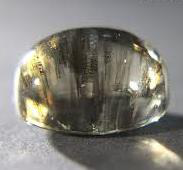

In [32]:
if uploader.value:
    # Get the first item from the tuple which is a dictionary
    file_info = uploader.value[0]
    
    # Access the content from the dictionary
    content = file_info['content']
    
    # Use the content to open an image
    image = Image.open(io.BytesIO(content))
    display(image)  # Optionally display the image

    # Resize and preprocess the image as required for your model
    image = image.resize((240, 240))
    img_array = np.array(image)
    img_array = img_array / 255.0  # Normalize if your model expects normalized inputs
    img_batch = np.expand_dims(img_array, axis=0)

    # Now img_batch is ready to be input into your model
else:
    print("No file uploaded. Please upload an image file.")

In [33]:
predictions = loaded_model.predict(img_batch)
predicted_class = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 47ms/step


In [34]:
# Assuming you have class names stored in a list called class_names
print("Predicted class:", class_names[predicted_class[0]])

Predicted class: Scapolite


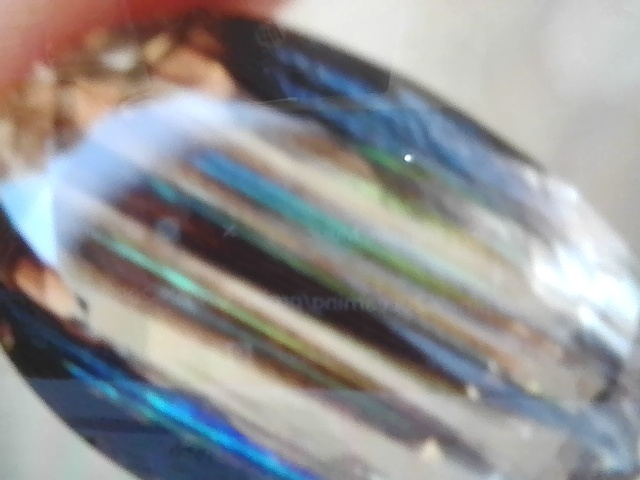

In [28]:
import cv2
from IPython.display import display, Image
import numpy as np

# Function to capture a single image from the webcam
def capture_image():
    cap = cv2.VideoCapture(0)  # '0' is typically the default value for the primary camera

    if not cap.isOpened():
        print("Cannot open camera")
        return None

    # Capture one frame
    ret, frame = cap.read()
    cap.release()  # Important to release the camera immediately

    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        return None
    
    # Convert color from BGR to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the captured image
    cv2.imwrite('captured_frame.jpg', cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))  # Save as JPG file
    display(Image(filename='captured_frame.jpg'))
    
    return frame

# Capture the image
captured_frame = capture_image()


In [29]:
from PIL import Image

def preprocess_image(frame, target_size=(240, 240)):
    if frame is None:
        return None
    # Resize and normalize the image
    image = Image.fromarray(frame)
    image = image.resize(target_size)
    image_array = np.array(image) / 255.0  # Normalize to 0-1 if needed
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

# Preprocess the captured image
img_batch = preprocess_image(captured_frame)


In [30]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('project_model')

# Predict using the preprocessed image
if img_batch is not None:
    predictions = model.predict(img_batch)
    predicted_class = np.argmax(predictions, axis=1)
    print("Predicted class index:", predicted_class)
    print("Predicted class:", class_names[predicted_class[0]])
else:
    print("Failed to capture or process an image.")


1/1 [==============================] - 0s 70ms/step
Predicted class index: [71]
Predicted class: Scapolite
